# Texlus first project

In [7]:
import numpy as np
import pandas as pd

In [10]:
data = pd.read_excel(r"C:\Users\HP\Desktop\python-student-performance-analysis\student_performance.xlsx")
data.head()

,student_id,name,gender,course,attendance,test_score,exam_score
0,ST0001,Student_1,Male,Web Development,73,88,57
1,ST0002,Student_2,Female,Web Development,92,66,79
2,ST0003,Student_3,Female,Web Development,82,69,92
3,ST0004,Student_4,Male,Web Development,77,87,72
4,ST0005,Student_5,Male,Data Analysis,71,46,74


In [11]:
data.describe()

,attendance,test_score,exam_score
count,2000.000000,2000.000000,2000.000000
mean,74.984500,67.906000,67.822000
std,14.747576,16.056372,16.122881
min,50.000000,40.000000,40.000000
25%,63.000000,54.000000,54.000000
50%,75.000000,68.000000,68.000000
75%,88.000000,82.000000,82.000000
max,100.000000,95.000000,95.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  2000 non-null   object
 1   name        2000 non-null   object
 2   gender      2000 non-null   object
 3   course      2000 non-null   object
 4   attendance  2000 non-null   int64 
 5   test_score  2000 non-null   int64 
 6   exam_score  2000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 109.5+ KB


In [13]:
data["Total_Score"] = (data["test_score"] + data["exam_score"])/2

In [14]:
data.head(10)

,student_id,name,gender,course,attendance,test_score,exam_score,Total_Score
0,ST0001,Student_1,Male,Web Development,73,88,57,72.5
1,ST0002,Student_2,Female,Web Development,92,66,79,72.5
2,ST0003,Student_3,Female,Web Development,82,69,92,80.5
3,ST0004,Student_4,Male,Web Development,77,87,72,79.5
4,ST0005,Student_5,Male,Data Analysis,71,46,74,60.0
5,ST0006,Student_6,Male,Web Development,93,73,58,65.5
6,ST0007,Student_7,Female,Web Development,98,51,42,46.5
7,ST0008,Student_8,Male,Data Analysis,90,57,42,49.5
8,ST0009,Student_9,Male,Data Analysis,71,46,40,43.0
9,ST0010,Student_10,Male,Data Analysis,50,57,88,72.5


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   2000 non-null   object 
 1   name         2000 non-null   object 
 2   gender       2000 non-null   object 
 3   course       2000 non-null   object 
 4   attendance   2000 non-null   int64  
 5   test_score   2000 non-null   int64  
 6   exam_score   2000 non-null   int64  
 7   Total_Score  2000 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [16]:

#Categorize performance:
def Performance(score):
    if score >=70:
        return "Excellent"
    elif score >=50:
        return "Average"
    else:
        return "Poor"
data["Performance"] = data["Total_Score"].apply(Performance)


In [17]:
data.head(10)

,student_id,name,gender,course,attendance,test_score,exam_score,Total_Score,Performance
0,ST0001,Student_1,Male,Web Development,73,88,57,72.5,Excellent
1,ST0002,Student_2,Female,Web Development,92,66,79,72.5,Excellent
2,ST0003,Student_3,Female,Web Development,82,69,92,80.5,Excellent
3,ST0004,Student_4,Male,Web Development,77,87,72,79.5,Excellent
4,ST0005,Student_5,Male,Data Analysis,71,46,74,60.0,Average
5,ST0006,Student_6,Male,Web Development,93,73,58,65.5,Average
6,ST0007,Student_7,Female,Web Development,98,51,42,46.5,Poor
7,ST0008,Student_8,Male,Data Analysis,90,57,42,49.5,Poor
8,ST0009,Student_9,Male,Data Analysis,71,46,40,43.0,Poor
9,ST0010,Student_10,Male,Data Analysis,50,57,88,72.5,Excellent


In [18]:

#What is the average total score per course?
df = pd.DataFrame(data)

avg_score = df.groupby('course')['Total_Score'].mean()
print(avg_score)


course
Data Analysis      67.934696
Web Development    67.792879
Name: Total_Score, dtype: float64


In [19]:
#Which course has the highest performance?
Highest_course = avg_score.idxmax()
print("Highest Average Score:", Highest_course)

Highest Average Score: Data Analysis


In [20]:
#Does attendance affect performance?
correlation = df["attendance"].corr(df["Total_Score"])
print("Correlation between Attendance and Score:", correlation)

Correlation between Attendance and Score: 0.011563230343193244


In [21]:
#Performance comparison by gender
df = pd.DataFrame(data)

gender= df.groupby('gender')['Total_Score'].sum()
print(gender)

gender
Female    66231.5
Male      69496.5
Name: Total_Score, dtype: float64


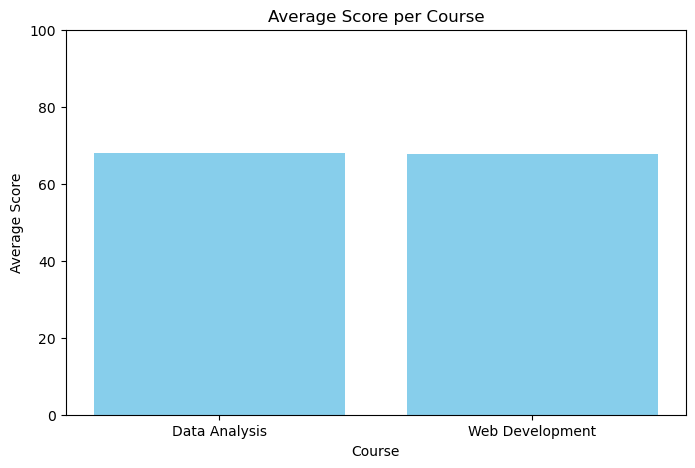

In [31]:
#Bar chart: Average score per course
import matplotlib.pyplot as plt
df = pd.DataFrame(data)

# Step 1: Calculate average per course
avg_df = df.groupby('course')['Total_Score'].mean().reset_index()
avg_df.rename(columns={'Total_Score': 'Avg_score'}, inplace=True)

plt.figure(figsize=(8,5))
plt.bar(avg_df["course"], avg_df["Avg_score"], color="skyblue")
plt.title("Average Score per Course")
plt.xlabel("Course")
plt.ylabel("Average Score")
plt.ylim(0, 100)

plt.savefig(r"C:\Users\HP\Desktop\python-student-performance-analysis\avg_score_per_course.png", dpi=300, bbox_inches="tight")
plt.show()

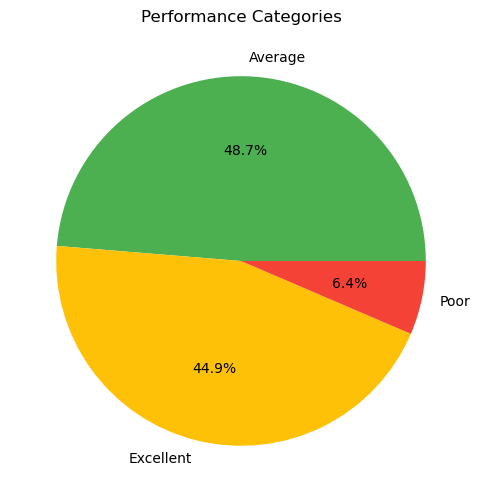

In [32]:
#Pie chart: Performance categories
category_counts = df['Performance'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['#4CAF50','#FFC107','#F44336'])
plt.title("Performance Categories")
plt.savefig(r"C:\Users\HP\Desktop\python-student-performance-analysis\performance_piechart.png", dpi=300, bbox_inches="tight")
plt.show()

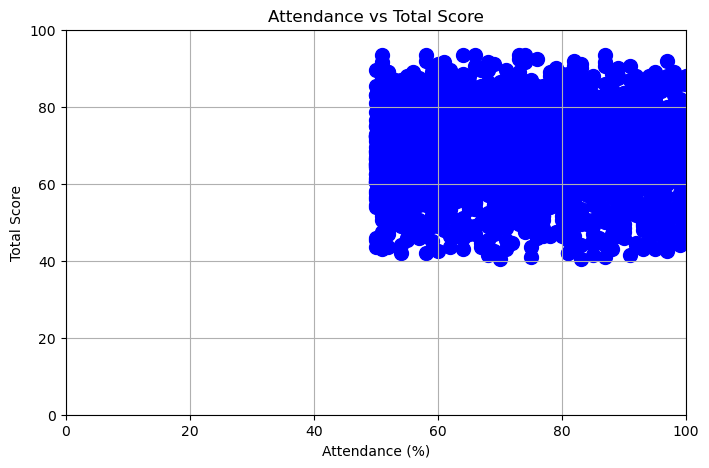

In [33]:
#Line or scatter plot: Attendance vs Total Score
plt.figure(figsize=(8,5))
plt.scatter(df["attendance"], df["Total_Score"], color="blue", s=100)  # s= marker size
plt.title("Attendance vs Total Score")
plt.xlabel("Attendance (%)")
plt.ylabel("Total Score")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.savefig(r"C:\Users\HP\Desktop\python-student-performance-analysis\attendance_scatterplot.png", dpi=300, bbox_inches="tight")
plt.show()

In [36]:
!jupyter nbconvert --to notebook --output r"C:\Users\HP\Desktop\python-student-performance-analysis\notebook\python_analysis" "python_analysis.ipynb"

This application is used to convert notebook files (*.ipynb)

[NbConvertApp] WARNING | pattern 'python_analysis.ipynb' matched no files



        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue noteboo